
# 2.0 Authenticating with Twitter's API


In [ ]:
!pip install Twython

In [2]:
from twython import Twython, TwythonError


## 2.1 Enter app info and get auth URL


In [4]:
# open the keys file
my_file = open("keys.txt", "r")

# read the raw data
content = my_file.read()

# split all lines by  newline character
API_KEY, API_SECRET_KEY = content.split("\n")

# close the file
my_file.close()

In [ ]:
twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

In [6]:
# Replace the verifier with the pin number obtained with your web browser in the previous step
VERIFIER = '6495870'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)


## 2.3 Use authorized tokens


In [7]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

{'contributors_enabled': False,
 'created_at': 'Thu Aug 26 00:17:27 +0000 2010',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'volto em breve',
 'entities': {'description': {'urls': []}},
 'favourites_count': 5070,
 'follow_request_sent': False,
 'followers_count': 171,
 'following': False,
 'friends_count': 89,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 183031171,
 'id_str': '183031171',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 1,
 'location': '',
 'name': 'julia',
 'needs_phone_verification': False,
 'notifications': False,
 'profile_background_color': '34BFBF',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme16/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme16/bg.gif',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/183031171/1602630101',
 'profile_image_url': 'http://

# 5.0 Creating social network graphs


In [8]:
import networkx as nx

D = nx.DiGraph()

university = twitter.show_user(screen_name='riachuelo')
author = twitter.show_user(screen_name='mitchomezzomo')

D.add_edge(university['screen_name'], author['screen_name'], weight=1)

In [9]:
list(D.edges(data=True))

[('riachuelo', 'mitchomezzomo', {'weight': 1})]

# 6.0 Twitter retweet network



## 6.1 Get some tweets

In [10]:
import itertools

NUM_TWEETS_TO_FETCH = 5000

cursor01 = twitter.cursor(twitter.search, q='lojas riachuelo', count=100, result_type='mixed')
cursor02 = twitter.cursor(twitter.search, q='na riachuelo', count=100, result_type='mixed')
cursor03 = twitter.cursor(twitter.search, q='da riachuelo', count=100, result_type='mixed')
cursor04 = twitter.cursor(twitter.search, q=' riachu ', count=100, result_type='mixed')
somatorio = [*cursor01, *cursor02, *cursor03, *cursor04]
search_tweets = list(itertools.islice(somatorio, NUM_TWEETS_TO_FETCH))
len(search_tweets)

3464

## 6.2 Filter retweets


In [11]:
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

706

In [12]:
import pandas as pd

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for tweet in search_tweets:
    dict_['user'].append(tweet['user']['screen_name'])
    dict_['date'].append(tweet['created_at'])
    dict_['text'].append(tweet['text'])
    dict_['favorite_count'].append(tweet['favorite_count'])
# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)

In [13]:
df.head()

,user,date,text,favorite_count
0,opablosilva,Tue Sep 14 23:10:54 +0000 2021,@riachuelo @cea_brasil @Lojas_Renner Uma excel...,0
1,riachuelo,Tue Sep 14 23:08:56 +0000 2021,@opablosilva @cea_brasil @Lojas_Renner Olá Pab...,0
2,opablosilva,Tue Sep 14 23:00:31 +0000 2021,O site da @cea_brasil é ruim. O da @Lojas_Renn...,0
3,vemeconomizar,Tue Sep 14 22:51:57 +0000 2021,CUPOM DE DESCONTO ✨💃\n\nShopee: CCAMI227\n\nAm...,0
4,Caiooliveirada6,Tue Sep 14 21:31:52 +0000 2021,@rodrigoterron Dps disso fecha com mais patroc...,0


In [14]:
df.shape

(3464, 4)

In [15]:
df.to_csv("riachu.csv")

## 6.3 Create DiGraph


In [16]:
import networkx as nx

D = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']
    
    # Edge direction: retweeted_sn -> retweeter_sn
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)

## 6.4 Analyze graph



### 6.4.1 Most retweeted user



Since the edges are in the direction of information flow, out-degree gives us the number of other users retweeting a given user. We can get the user with highest out-degree using the built-in `max` function:

In [17]:
max(D.nodes, key=D.out_degree)

'pavliique'

In [18]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

[('pavliique', 114),
 ('Beccky23', 97),
 ('jungquerotti', 68),
 ('GlaucoS41843642', 45),
 ('riachuelo', 34)]

In [19]:
D.out_degree()

OutDegreeView({'riachuelo': 34, 'Glooaseul': 0, 'small_baechu': 0, 'GlaucoS41843642': 45, 'tizquadros': 0, 'InfoJobsVENDAS': 1, 'RecifeBot': 0, 'joanadarc2605': 0, 'josy_49': 0, 'paulacruz_clay': 0, 'osmarkss': 0, 'LaerciodeCastr4': 0, 'jucaramteixeira': 0, 'nathenes': 0, 'Sol07798202': 0, 'BaginiDe': 0, 'augusto7_cesar': 0, 'EraldoFrancisc2': 0, 'liamabat': 0, 'JoyceSanchotene': 0, 'jucaravlf': 0, 'PetucioS': 0, 'MarinesMoura': 0, 'vilmarvs60': 0, 'AmaralLula': 0, 'renanbnunes': 0, 'liubortuluzi': 0, 'ComunelloChris': 0, 'geraldoazevedof': 0, 'LhcLulalivre': 0, 'elis20715486': 0, 'jotahsilva': 0, 'MoyenneA': 0, 'ruiva08': 0, 'FogodoEon': 0, 'KrenRG': 0, 'JotaKar': 0, 'PFSilveira': 0, 'sonia_divinaa': 0, 'mil_jus': 0, '_PirLimPimPim_': 0, 'sandraffarias': 0, 'Torreslcbrasil': 0, 'joaomaringa': 0, 'Comedordefogo': 0, 'wpz13': 0, 'lilileite4': 0, 'wilsondenotari': 0, 'lauracleite': 0, 'joaovf08': 0, 'pcfl1897': 0, 'pavliique': 114, 'Fannyzinha_02': 0, 'deusacontent': 0, 'emygrx': 0, 'cla

In [20]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('pavliique', 114),
 ('Beccky23', 97),
 ('jungquerotti', 68),
 ('GlaucoS41843642', 45),
 ('riachuelo', 36)]


### 6.4.2 Anomaly detection


In [21]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('_riachu', 7),
 ('copinho_swiftie', 5),
 ('ranucacto', 5),
 ('Beccky23', 3),
 ('AnaPaul96065645', 3)]

### 6.4.3 Connectivity


In [22]:
nx.is_weakly_connected(D)

False

In [23]:
nx.number_weakly_connected_components(D)

93

### 6.4.4 Drawing


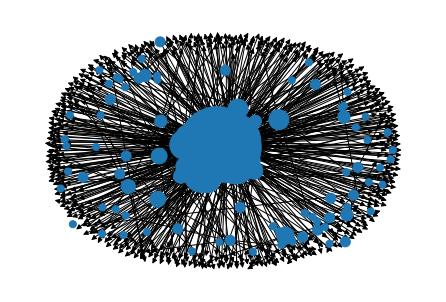

In [24]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)
nx.write_graphml(D, "riachu_rtt.graphml")

Note that in this simplistic drawing, nodes with zero out-strength are not drawn on the diagram because their size is 0. This suits us fine; only the users who have been retweeted are drawn here.

# 7.0 Twitter mention network



## 7.1 Get some tweets

In [25]:
import itertools

NUM_TWEETS_TO_FETCH = 5000

cursor01 = twitter.cursor(twitter.search, q='lojas riachuelo', count=100, result_type='mixed')
cursor02 = twitter.cursor(twitter.search, q='na riachuelo', count=100, result_type='mixed')
cursor03 = twitter.cursor(twitter.search, q='da riachuelo', count=100, result_type='mixed')
cursor04 = twitter.cursor(twitter.search, q=' riachu ', count=100, result_type='mixed')
somatorio = [*cursor01, *cursor02, *cursor03, *cursor04]
len(search_tweets)

3464

In [ ]:
search_tweets[0]

In [27]:
import networkx as nx

D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*my_edge):
            D.edges[my_edge]['weight'] += 1
        else:
            D.add_edge(*my_edge, weight=1)

## 7.3 Analyze graph



### 7.3.1 Most  popular users


In [28]:
max(D.nodes, key=D.in_degree)

'riachuelo'

In [29]:
from operator import itemgetter

sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]

[('riachuelo', 311),
 ('Beccky23', 119),
 ('pavliique', 114),
 ('jungquerotti', 71),
 ('GlaucoS41843642', 45)]

In [30]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('riachuelo', 411),
 ('Beccky23', 137),
 ('pavliique', 114),
 ('jungquerotti', 71),
 ('GlaucoS41843642', 45)]


### 7.3.2 Conversation drivers


In [31]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('riachuelo', 899),
 ('vicentefbs', 50),
 ('Beccky23', 14),
 ('Aquariusdboyy', 12),
 ('faelao_', 12)]

### 7.3.3 Connectivity


In [32]:
nx.is_weakly_connected(D)

False

In [33]:
nx.number_weakly_connected_components(D)

442

### 7.3.4 Drawing


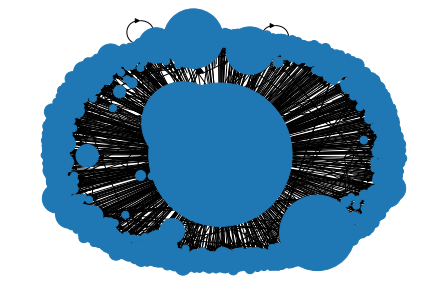

In [34]:
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)
nx.write_graphml(D, "riachu_men.graphml")